In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [3]:
data=pd.read_csv('Buying Customer Behavior .csv')

In [5]:
data

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [11]:
data.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [13]:
data.dropna(subset=['Satisfaction Level'], inplace=True)

In [17]:
data = pd.get_dummies(data, columns=['Gender', 
                                     'City', 
                                     'Membership Type' 
                                     ], drop_first=True)

In [19]:
data

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Gender_Male,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Gold,Membership Type_Silver
0,101,29,1120.20,14,4.6,True,25,Satisfied,False,False,False,False,True,False,True,False
1,102,34,780.50,11,4.1,False,18,Neutral,True,False,True,False,False,False,False,True
2,103,43,510.75,9,3.4,True,42,Unsatisfied,False,False,False,False,False,False,False,False
3,104,30,1480.30,19,4.7,False,12,Satisfied,True,False,False,False,False,True,True,False
4,105,27,720.40,13,4.0,True,55,Unsatisfied,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,446,32,660.30,10,3.8,True,42,Unsatisfied,True,False,False,True,False,False,False,True
346,447,36,470.50,8,3.0,False,27,Neutral,False,True,False,False,False,False,False,False
347,448,30,1190.80,16,4.5,True,28,Satisfied,False,False,False,False,True,False,True,False
348,449,34,780.20,11,4.2,False,21,Neutral,True,False,True,False,False,False,False,True


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 349
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               348 non-null    int64  
 1   Age                       348 non-null    int64  
 2   Total Spend               348 non-null    float64
 3   Items Purchased           348 non-null    int64  
 4   Average Rating            348 non-null    float64
 5   Discount Applied          348 non-null    bool   
 6   Days Since Last Purchase  348 non-null    int64  
 7   Satisfaction Level        348 non-null    object 
 8   Gender_Male               348 non-null    bool   
 9   City_Houston              348 non-null    bool   
 10  City_Los Angeles          348 non-null    bool   
 11  City_Miami                348 non-null    bool   
 12  City_New York             348 non-null    bool   
 13  City_San Francisco        348 non-null    bool   
 14  Membership Type

In [23]:
data['Discount Applied'] = data['Discount Applied'].astype(int)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Total Spend', 'Age', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase',]] = scaler.fit_transform(data[['Total Spend', 'Age', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']])

In [27]:
data['Purchase Frequency'] = data['Items Purchased'] / data['Days Since Last Purchase']
data['Customer Lifetime Value'] = data['Total Spend'] * data['Average Rating']

In [29]:
data.drop(columns=['Customer ID'], inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 349
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       348 non-null    float64
 1   Total Spend               348 non-null    float64
 2   Items Purchased           348 non-null    float64
 3   Average Rating            348 non-null    float64
 4   Discount Applied          348 non-null    int32  
 5   Days Since Last Purchase  348 non-null    float64
 6   Satisfaction Level        348 non-null    object 
 7   Gender_Male               348 non-null    bool   
 8   City_Houston              348 non-null    bool   
 9   City_Los Angeles          348 non-null    bool   
 10  City_Miami                348 non-null    bool   
 11  City_New York             348 non-null    bool   
 12  City_San Francisco        348 non-null    bool   
 13  Membership Type_Gold      348 non-null    bool   
 14  Membership Type

In [33]:
le=LabelEncoder()
data['Satisfaction Level'] = le.fit_transform(data['Satisfaction Level'])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 349
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       348 non-null    float64
 1   Total Spend               348 non-null    float64
 2   Items Purchased           348 non-null    float64
 3   Average Rating            348 non-null    float64
 4   Discount Applied          348 non-null    int32  
 5   Days Since Last Purchase  348 non-null    float64
 6   Satisfaction Level        348 non-null    int32  
 7   Gender_Male               348 non-null    bool   
 8   City_Houston              348 non-null    bool   
 9   City_Los Angeles          348 non-null    bool   
 10  City_Miami                348 non-null    bool   
 11  City_New York             348 non-null    bool   
 12  City_San Francisco        348 non-null    bool   
 13  Membership Type_Gold      348 non-null    bool   
 14  Membership Type

In [37]:
X = data.drop(columns=['Satisfaction Level'])
y = data['Satisfaction Level']

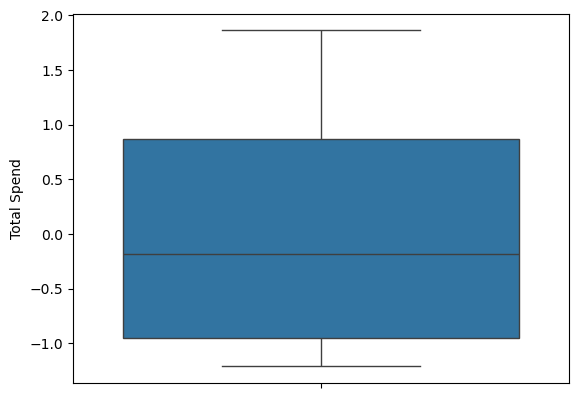

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data['Total Spend'])
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
MM = MinMaxScaler()
X_train = MM.fit_transform(X_train)
X_test = MM.fit_transform(X_test)

In [45]:
models={
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}
    

In [47]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9714
[[26  0  0]
 [ 2 20  0]
 [ 0  0 22]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.91      0.95        22
           2       1.00      1.00      1.00        22

    accuracy                           0.97        70
   macro avg       0.98      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70

Random Forest Accuracy: 1.0000
[[26  0  0]
 [ 0 22  0]
 [ 0  0 22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        22

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

Support Vector Machine Accuracy: 0.9714
[[26  0  0]
 [ 2 20  0]
 [ 0  0 22]]
              preci

In [49]:
df=pd.read_csv('Buying Customer Behavior .csv')

In [51]:
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [53]:
df.dropna(subset=['Satisfaction Level'], inplace=True)

In [59]:
X = df.drop(columns=['Satisfaction Level'])
y = df['Satisfaction Level']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
X_train

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
332,433,Male,28,San Francisco,Gold,1490.10,21,4.9,False,11
269,370,Female,31,New York,Gold,1140.60,15,4.5,True,30
25,126,Male,35,Los Angeles,Silver,810.90,12,4.3,False,13
189,290,Male,28,San Francisco,Gold,1500.10,21,4.9,False,10
193,294,Male,33,Los Angeles,Silver,830.75,13,4.2,False,14
...,...,...,...,...,...,...,...,...,...,...
116,217,Female,41,Chicago,Bronze,485.25,9,3.6,True,39
186,287,Female,31,New York,Gold,1130.60,15,4.5,True,26
262,363,Female,36,Houston,Bronze,430.50,8,3.1,False,21
137,238,Female,36,Houston,Bronze,470.50,8,3.0,False,18


In [65]:
numerical_features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
categorical_features = ['Gender', 'City', 'Membership Type']
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])


In [67]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [69]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'classifier__C': [0.01, 0.1, 1, 10, 100],
            'classifier__penalty': ['l1', 'l2'],
            'classifier__solver': ['liblinear', 'saga']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4]
        }
    },
    'SVM': {
        'model': SVC(kernel='rbf', probability=True, random_state=42),
        'params': {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__kernel': ['linear', 'rbf', 'poly'],
            'classifier__gamma': ['scale', 'auto']
        }
    }
}

In [73]:
results = {}
for name, config in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', config['model'])
    ])
    grid_search = GridSearchCV(pipeline, param_grid=config['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Best Parameters: {grid_search.best_params_}")
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Logistic Regression Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Logistic Regression Accuracy: 1.0000
[[23  0  0]
 [ 0 23  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

     Neutral       1.00      1.00      1.00        23
   Satisfied       1.00      1.00      1.00        23
 Unsatisfied       1.00      1.00      1.00        24

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

Random Forest Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Random Forest Accuracy: 1.0000
[[23  0  0]
 [ 0 23  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

     Neutral       1.00      1.00      1.00        23
   Satisfied       1.00      1.00      1.00        23
 Unsatisfied       1.00      1